In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

In [3]:
def create_paired_images(index):
    # Setup the plot for colored and black & white images
    fig_colored, ax_colored = plt.subplots(figsize=(10.24, 10.24))
    fig_bw, ax_bw = plt.subplots(figsize=(10.24, 10.24))

    ax_colored.set_xlim(0, 10)
    ax_colored.set_ylim(0, 10)
    ax_colored.axis('off')  # Hide axes

    ax_bw.set_xlim(0, 10)
    ax_bw.set_ylim(0, 10)
    ax_bw.axis('off')  # Hide axes

    # Number of each shape
    num_figs = np.random.randint(1, 30)

    # Create and add shapes to both images
    for _ in range(num_figs):
        x, y = np.random.uniform(0, 10.24), np.random.uniform(0, 10.24)
        width, height = np.random.uniform(0.5, 1.5), np.random.uniform(0.5, 1.5)
        color = np.random.rand(3,)
        rect_colored = plt.Rectangle((x, y), width, height, fill=True, edgecolor=color, facecolor=color)
        rect_bw = plt.Rectangle((x, y), width, height, fill=True, edgecolor='black', facecolor='white', linewidth=1)
        ax_colored.add_patch(rect_colored)
        ax_bw.add_patch(rect_bw)
        
        points = np.random.uniform(0, 10.24, (3, 2))
        color = np.random.rand(3,)
        triangle_colored = plt.Polygon(points, fill=True, edgecolor=color, facecolor=color)
        triangle_bw = plt.Polygon(points, fill=True, edgecolor='black', facecolor='white', linewidth=1)
        ax_colored.add_patch(triangle_colored)
        ax_bw.add_patch(triangle_bw)
        
        x, y = np.random.uniform(0, 10.24), np.random.uniform(0, 10.24)
        radius = np.random.uniform(0.5, 1.5)
        color = np.random.rand(3,)
        circle_colored = plt.Circle((x, y), radius, fill=True, edgecolor=color, facecolor=color)
        circle_bw = plt.Circle((x, y), radius, fill=True, edgecolor='black', facecolor='white', linewidth=1)
        ax_colored.add_patch(circle_colored)
        ax_bw.add_patch(circle_bw)

    # Save both figures
    fig_colored.tight_layout(pad=0)
    fig_bw.tight_layout(pad=0)
    
    fig_colored.canvas.draw()
    image_colored = np.frombuffer(fig_colored.canvas.tostring_rgb(), dtype='uint8')
    image_colored = image_colored.reshape(fig_colored.canvas.get_width_height()[::-1] + (3,))

    fig_bw.canvas.draw()
    image_bw = np.frombuffer(fig_bw.canvas.tostring_rgb(), dtype='uint8')
    image_bw = image_bw.reshape(fig_bw.canvas.get_width_height()[::-1] + (3,))

    plt.close(fig_colored)
    plt.close(fig_bw)

    return image_colored, image_bw

  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_2900/4050594372.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_colored = np.frombuffer(fig_colored.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykernel_2900/4050594372.py:51: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_bw = np.frombuffer(fig_bw.canvas.tostring_rgb(), dtype='uint8')
 31%|███       | 3116/10000 [12:36<27:50,  4.12it/s]  


KeyboardInterrupt: 

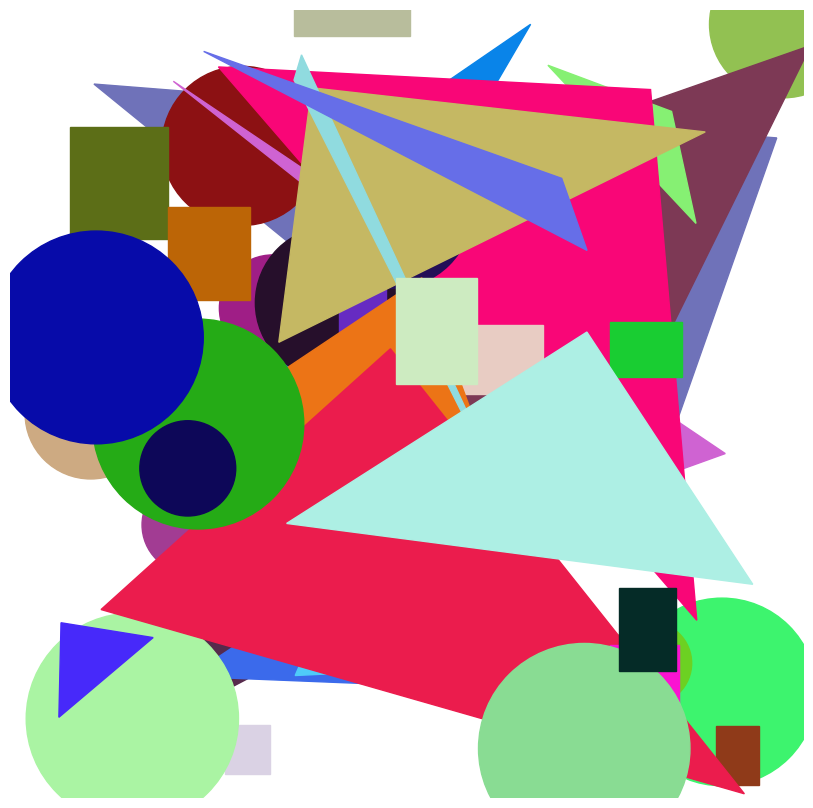

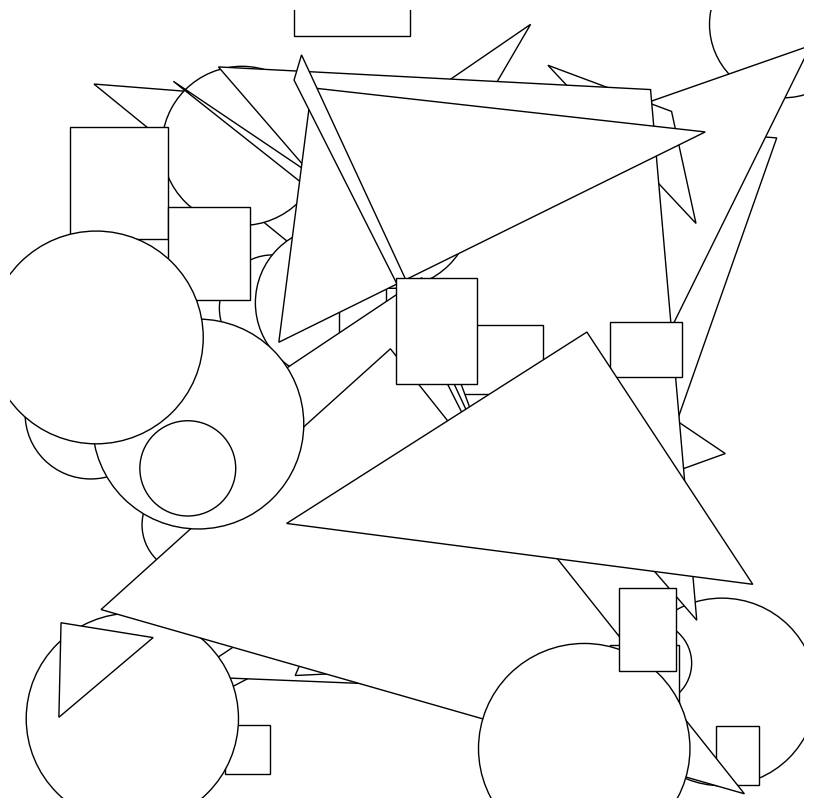

In [5]:
image_files = []
for i in tqdm(range(3116, 10000)):
    image_color, image_line = create_paired_images(i)
    plt.imsave(f'/mnt/d/Datasets/simple_fpath_data/10000/inputs/color_{i+1}.png', image_color)
    plt.imsave(f'/mnt/d/Datasets/simple_fpath_data/10000/targets/line_{i+1}.png', image_line)